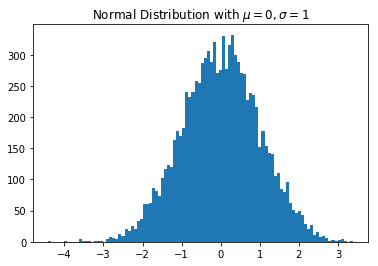

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x=np.random.randn(10000);
plt.hist(x,100);
plt.title("Normal Distribution with $\mu=0, \sigma =1$");
plt.savefig('matplotlib_histogram.png')
plt.show()


/Users/sumitmaurya/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py:177: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


Data read into a pandas dataframe!
<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>
982
Afghanistan                                              True
Albania                                                 False
Algeria                                                 False
American Samoa                                          False
Andorra                                                 False
Angola                                                  False
Antigua and Barbuda                                     False
Argentina                                               False
Armenia                                                  True
Australia                                               False
Austria                                                 False
Azerbaijan                                               True
Bahamas                                                 False
Bahrain                                                  True
Bangl

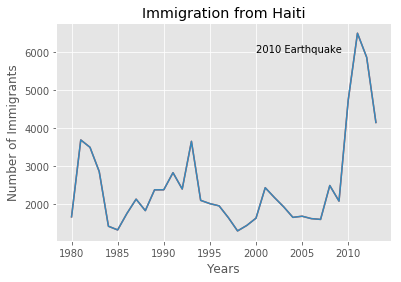

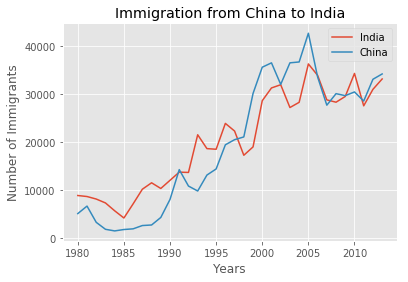

before transpose                                                   Continent  \
India                                                   Asia   
China                                                   Asia   
United Kingdom of Great Britain and Northern Ir...    Europe   
Philippines                                             Asia   
Pakistan                                                Asia   

                                                                Region  \
India                                                    Southern Asia   
China                                                     Eastern Asia   
United Kingdom of Great Britain and Northern Ir...     Northern Europe   
Philippines                                         South-Eastern Asia   
Pakistan                                                 Southern Asia   

                                                               DevName   1980  \
India                                               Developing regions   

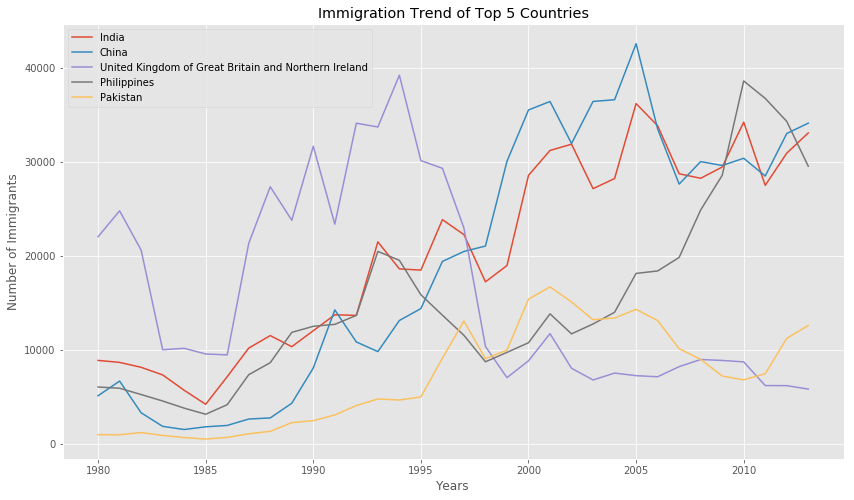

In [2]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

df_can = pd.read_excel('https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skip_footer=2)

print ('Data read into a pandas dataframe!')
df_can.head();
df_can.tail();
#df_can.info();
#column list
df_can.columns.values
#get the index
df_can.index.values
#types of index and columns
print(type(df_can.columns))
print(type(df_can.index))

df_can.columns.tolist();
df_can.index.tolist();
df_can.shape   
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns
df_can['Total'] = df_can.sum(axis=1)
df_can.isnull().sum()
df_can.describe()

df_can.Country  # returns a series
df_can[['Country', 1980, 1981, 1982, 1983, 1984, 1985]] # returns a dataframe
# notice that 'Country' is string, and the years are integers. 
# for the sake of consistency, we will convert all column names to string later on.

df_can.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()
df_can.head(3)
# optional: to remove the name of the index
df_can.index.name = None
df_can.head(3)
# 1. the full row data (all columns)
#print(df_can.loc['Japan'])

# alternate methods
#print(df_can.iloc[87])
#print(df_can[df_can.index == 'Japan'].T.squeeze())
# 2. for year 2013
#print(df_can.loc['Japan', 2013])

# alternate method
print(df_can.iloc[87, 36]) # year 2013 is the last column, with a positional index of 36
# 3. for years 1980 to 1985
#print(df_can.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984]])
#print(df_can.iloc[87, [3, 4, 5, 6, 7, 8]])
df_can.columns = list(map(str, df_can.columns))
#[print (type(x)) for x in df_can.columns.values] #<-- uncomment to check type of column headers
#df_can.head()
# useful for plotting later on
years = list(map(str, range(1980, 2014)))
years

#filter the dataframe based on conditions
# 1. create the condition boolean series
condition = df_can['Continent'] == 'Asia'
print (condition)
# 2. pass this condition into the dataFrame
df_can[condition]
# we can pass mutliple criteria in the same line. 
# let's filter for AreaNAme = Asia and RegName = Southern Asia

df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]

# note: When using 'and' and 'or' operators, pandas requires we use '&' and '|' instead of 'and' and 'or'
# don't forget to enclose the two conditions in parentheses

print ('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(2)

%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
print(plt.style.available)
mpl.style.use(['ggplot']) # optional: for ggplot-like style

haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()
#haiti.plot()
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2000, 6000, '2010 Earthquake') # see note below



plt.show() # need this line to show the updates made to the figure

df_CI=df_can.loc[['India','China'],years]
df_CI.head()
df_CI = df_CI.transpose()
df_CI.head()
df_CI.index = df_CI.index.map(int)
df_CI.plot(kind="line")

plt.title('Immigration from China to India')
plt.xlabel('Years')
plt.ylabel('Number of Immigrants')
plt.show()



df_can.sort_values(by='Total',ascending=False,axis=0,inplace=True)
df_top5 =df_can.head(5)
print("before transpose"+str(df_top5))
df_top5 = df_top5[years].transpose() 
print("after transpose"+str(df_top5))
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')
plt.show()



/Users/sumitmaurya/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py:177: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


Data downloaded and read into a dataframe!
(195, 43)
data dimensions: (195, 38)
Matplotlib version:  2.2.2
[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


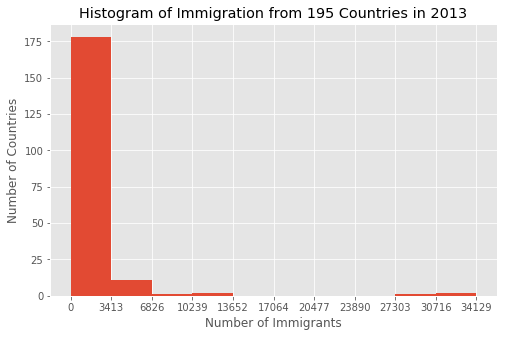

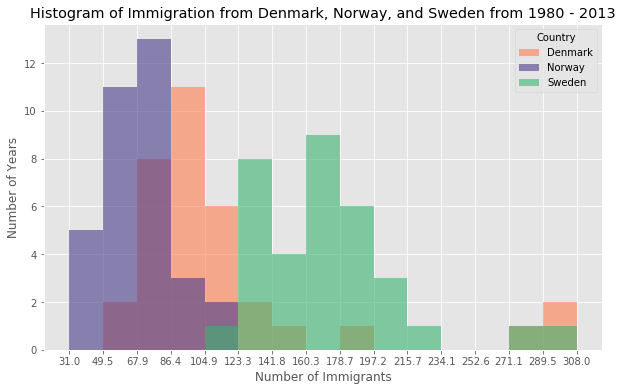

aliceblue #F0F8FF
antiquewhite #FAEBD7
aqua #00FFFF
aquamarine #7FFFD4
azure #F0FFFF
beige #F5F5DC
bisque #FFE4C4
black #000000
blanchedalmond #FFEBCD
blue #0000FF
blueviolet #8A2BE2
brown #A52A2A
burlywood #DEB887
cadetblue #5F9EA0
chartreuse #7FFF00
chocolate #D2691E
coral #FF7F50
cornflowerblue #6495ED
cornsilk #FFF8DC
crimson #DC143C
cyan #00FFFF
darkblue #00008B
darkcyan #008B8B
darkgoldenrod #B8860B
darkgray #A9A9A9
darkgreen #006400
darkgrey #A9A9A9
darkkhaki #BDB76B
darkmagenta #8B008B
darkolivegreen #556B2F
darkorange #FF8C00
darkorchid #9932CC
darkred #8B0000
darksalmon #E9967A
darkseagreen #8FBC8F
darkslateblue #483D8B
darkslategray #2F4F4F
darkslategrey #2F4F4F
darkturquoise #00CED1
darkviolet #9400D3
deeppink #FF1493
deepskyblue #00BFFF
dimgray #696969
dimgrey #696969
dodgerblue #1E90FF
firebrick #B22222
floralwhite #FFFAF0
forestgreen #228B22
fuchsia #FF00FF
gainsboro #DCDCDC
ghostwhite #F8F8FF
gold #FFD700
goldenrod #DAA520
gray #808080
green #008000
greenyellow #ADFF2F


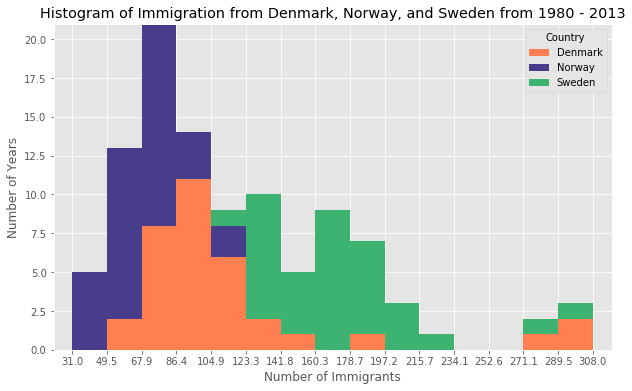

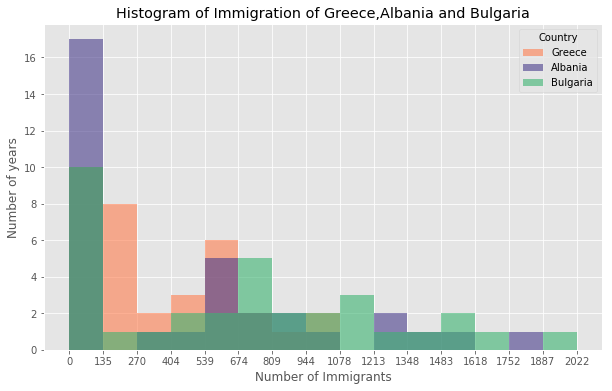

In [57]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

df_can = pd.read_excel('https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skip_footer=2
                      )

print('Data downloaded and read into a dataframe!')

df_can.head()
# print the dimensions of the dataframe
print(df_can.shape)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()
# let's examine the types of the column labels
all(isinstance(column, str) for column in df_can.columns)
df_can.columns = list(map(str, df_can.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)
df_can.columns = list(map(str, df_can.columns))

# let's check the column labels types now
all(isinstance(column, str) for column in df_can.columns)
df_can.set_index('Country', inplace=True)

# let's view the first five elements and see how the dataframe was changed
df_can.head()
df_can['Total'] = df_can.sum(axis=1)

# let's view the first five elements and see how the dataframe was changed
df_can.head()
print ('data dimensions:', df_can.shape)
# finally, let's create a list of years from 1980 - 2013
# this will come in handy when we start plotting the data
years = list(map(str, range(1980, 2014)))

years
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df_can.head(5)
df_least5=df_can.tail(5)

# transpose the dataframe
# df_top5 = df_top5[years].transpose() 
# df_least5 = df_least5[years].transpose() 


# df_top5.head()
# print(df_least5.head())
# df_least5.index=df_least5.index.map(int)
# df_least5.plot(kind='area',alpha=1,stacked=False,figsize=(20,10))

# plt.title('Immigrants Trend of 5 countries least contribution to India to Canada.');
# plt.ylabel('Number of Immigrant');
# plt.xlabel('Years')

# #option 2: preferred option with more flexibility
# ax = df_least5.plot(kind='area', alpha=0.35, figsize=(20, 10))

# ax.set_title('Immigration Trend of Top 5 Countries')
# ax.set_ylabel('Number of Immigrants')
# ax.set_xlabel('Years')
# plt.show()
# # let's quickly view the 2013 data
df_can['2013'].head()
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_can['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins
df_can['2013'].plot(kind='hist', figsize=(8, 5),xticks=bin_edges)

plt.title('Histogram of Immigration from 195 Countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label
 
plt.show()

# let's quickly view the dataset 
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]
# generate histogram
#df_can.loc[['Denmark', 'Norway', 'Sweden'], years].plot.hist()
# generate histogram
# transpose dataframe
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()
count,bin_edges=np.histogram(df_t,15);
df_t.plot(kind='hist',figsize=(10,6),bins=15,alpha=0.6,xticks=bin_edges,color=['coral','darkslateblue','mediumseagreen'])
#df_t.plot(kind='hist', figsize=(10, 6))

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()
#color code and name
import matplotlib
for name, hex in matplotlib.colors.cnames.items():
    print(name, hex)
    
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

# stacked Histogram
df_t.plot(kind='hist',
          figsize=(10, 6), 
          bins=15,
          xticks=bin_edges,
          color=['coral', 'darkslateblue', 'mediumseagreen'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from Denmark, Norway, and Sweden from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants') 

plt.show()    
df_cof = df_can.loc[['Greece', 'Albania', 'Bulgaria'], years]

df_cof=df_cof.transpose()

count,bin_edges1 = np.histogram(df_cof,15)

df_cof.plot(kind='hist',figsize=(10,6),bins=15,alpha=0.6,xticks=bin_edges1,color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.title('Histogram of Immigration of Greece,Albania and Bulgaria')
plt.ylabel('Number of years')
plt.xlabel('Number of Immigrants')
plt.show()


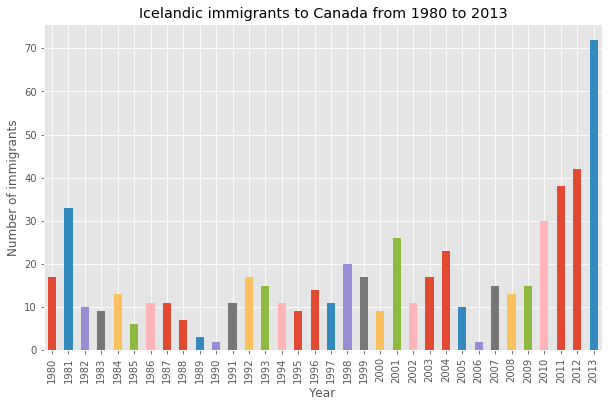

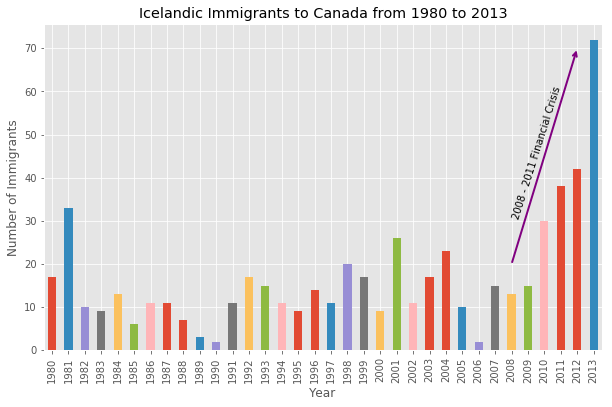

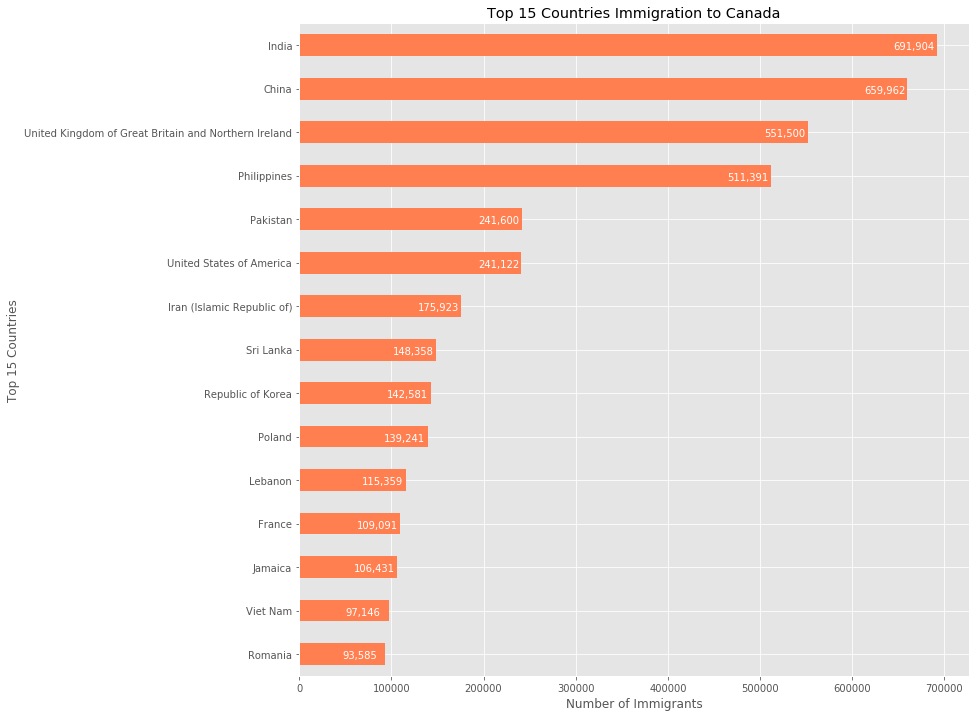

In [3]:
# step 1: get the data
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()
# step 2: plot data
df_iceland.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot
plt.ylabel('Number of immigrants') # add y-label to the plot
plt.title('Icelandic immigrants to Canada from 1980 to 2013') # add title to the plot

plt.show()
df_iceland.plot(kind='bar', figsize=(10, 6), rot=90) # rotate the bars by 90 degrees

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Icelandic Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',                      # s: str. Will leave it blank for no text
             xy=(32, 70),             # place head of the arrow at point (year 2012 , pop 70)
             xytext=(28, 20),         # place base of the arrow at point (year 2008 , pop 20)
             xycoords='data',         # will use the coordinate system of the object being annotated 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='purple', lw=2)
            )
plt.annotate('2008 - 2011 Financial Crisis', # text to display
             xy=(28, 30),                    # start the text at at point (year 2008 , pop 30)
             rotation=72.5,                  # based on trial and error to match the arrow
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )

plt.show()

df_can.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_can['Total'].tail(15)
df_top15
df_top15.plot(kind="barh",figsize=(12,12),color='coral')
plt.xlabel("Number of Immigrants")
plt.ylabel('Top 15 Countries')
plt.title("Top 15 Countries Immigration to Canada")
for index, value in enumerate(df_top15): 
  #  print(index);print(value)
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
plt.show()


<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


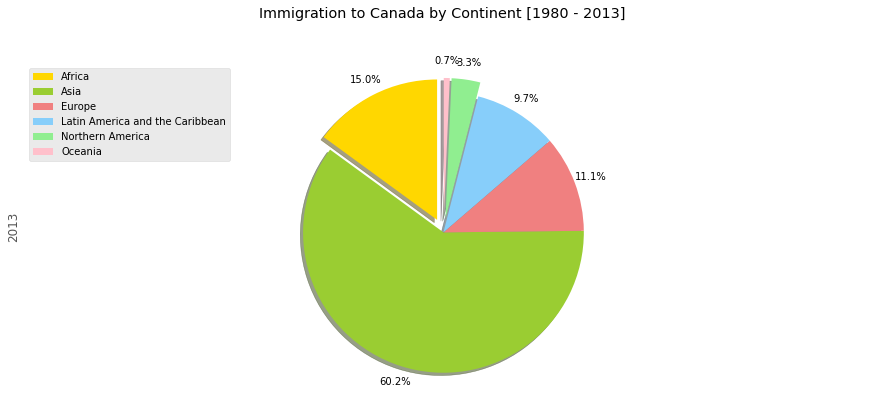

In [5]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# we can not use it further until we apply a function (eg .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()
# autopct create %, start angle represent starting point
# df_continents['Total'].plot(kind='pie',
#                             figsize=(5, 6),
#                             autopct='%1.1f%%', # add in percentages
#                             startangle=90,     # start angle 90° (Africa)
#                             shadow=True,       # add shadow      
#                             )

# plt.title('Immigration to Canada by Continent [1980 - 2013]')
# plt.axis('equal') # Sets the pie chart to look like a circle.

# plt.show()
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.
#for new immigrants just change the columns name
df_continents['2013'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

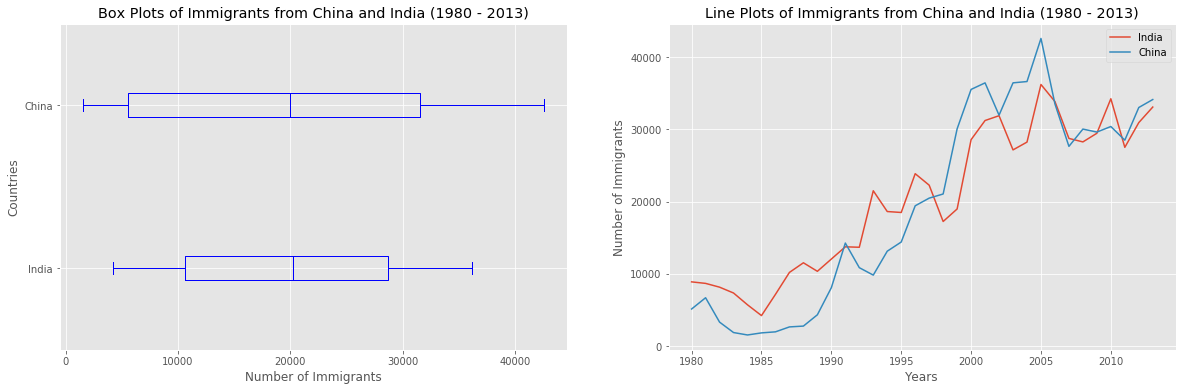

In [6]:
# to get a dataframe, place extra square brackets around 'Japan'.
# df_japan = df_can.loc[['Japan'], years].transpose()
# df_japan.head()
# df_japan.plot(kind='box', figsize=(8, 6))

# plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
# plt.ylabel('Number of Immigrants')

# plt.show()
# df_japan.describe()

# df_CI= df_can.loc[['India','China'],years].transpose()
# df_CI.head()
# df_CI.plot(kind='box', figsize=(8, 6),color='blue', vert=False)

# plt.title('Box plot of India and China Immigrants from 1980 - 2013')
# plt.ylabel('Number of Immigrants')

# plt.show()
# df_CI.describe()
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989']
['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999']
['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009']
India                                                    82154
China                                                    32003
United Kingdom of Great Britain and Northern Ireland    179171
Philippines                                              60764
Pakistan                                                 10591
dtype: int64
India                                                   180395
China                                                   161528
United Kingdom of Great Britain and Northern Ireland    261966
Philippines                                             138482
Pakistan                                                 65302
dtype: int64
India                                                   303591
China                                 

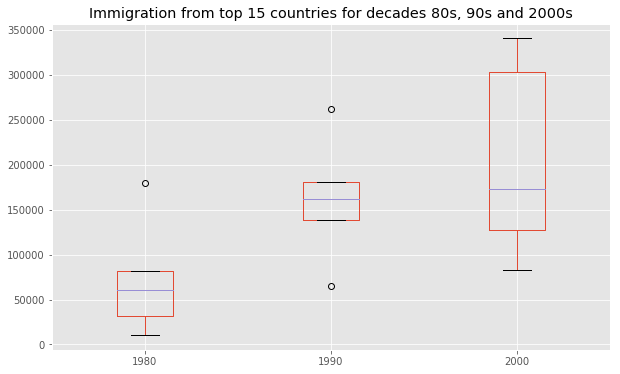

,1980,1990,2000
India,82154,180395,303591
China,32003,161528,340385


In [12]:
df_top15= df_can.sort_values(['Total'],ascending=False,axis=0).head()
df_top15.head(15)
#create a list all years in decades 80's ,90's am=nd 00's

years_80 = list(map(str,range(1980,1990)))
print(years_80)
years_90 = list(map(str,range(1990,2000)))
print(years_90)
years_00 = list(map(str,range(2000,2010)))
print(years_00)
#slice the original dataframe df_can to create a series of for each decade
df_80s=df_top15.loc[:,years_80].sum(axis=1)
print(df_80s)
df_90s=df_top15.loc[:,years_90].sum(axis=1)
print(df_90s)
df_00s=df_top15.loc[:,years_00].sum(axis=1)
print(df_00s)
#mergw the three series in a new dataframe
new_df= pd.DataFrame({'1980':df_80s,'1990':df_90s,'2000':df_00s})
new_df.plot(kind='box', figsize=(10, 6))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()
new_df
# let's check how many entries fall above the outlier threshold 
new_df[new_df['2000']> 209611.5]


/Users/sumitmaurya/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py:177: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


Data downloaded and read into a dataframe!
data dimensions: (195, 38)


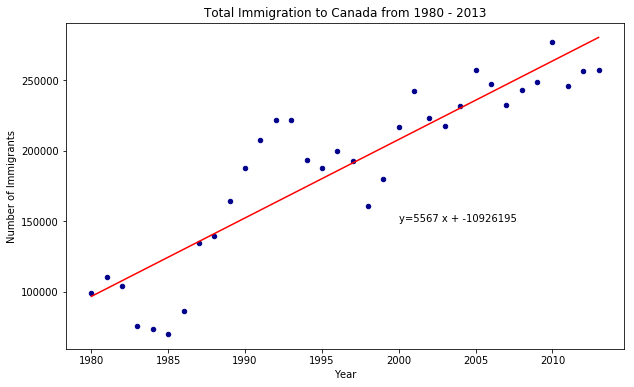

No. Immigrants = 5567 * Year + -10926195


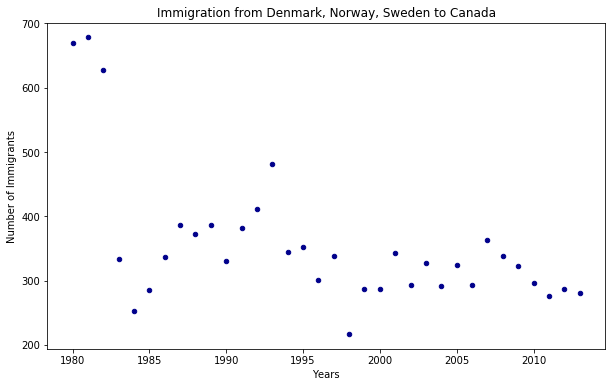

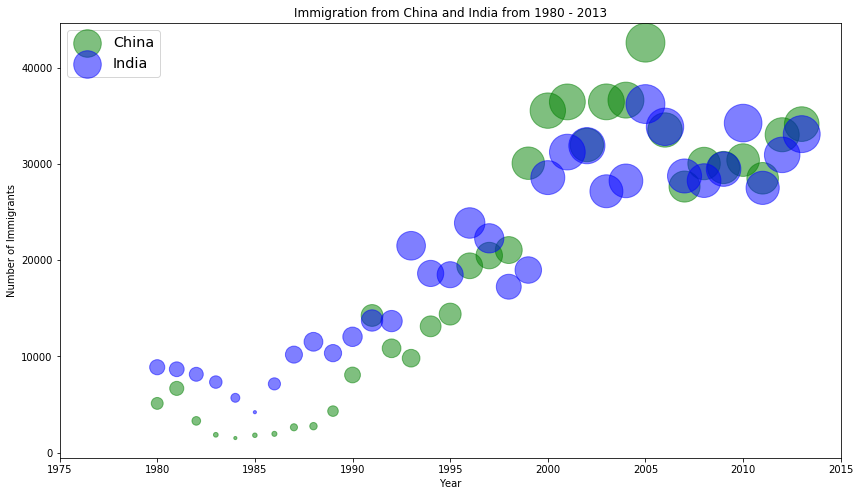

In [37]:
# use the inline backend to generate the plots within the browser
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
df_can = pd.read_excel('https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skip_footer=2
                      )

print('Data downloaded and read into a dataframe!')
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace=True)

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimensions:', df_can.shape)

# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))


# change the years to type int (useful for regression later on)
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
print('No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) );

df_countries = df_can.loc[['Denmark','Norway','Sweden'],years].transpose();
#print(df_countries)
df_total = pd.DataFrame(df_countries.sum(axis=1))
#print(df_total)
# reset index in place
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total.columns

df_total['year']=df_total['year'].astype(int)
df_total.head()
df_total.plot(kind='scatter',x='year',y='total',figsize=(10,6),color='darkblue')
plt.title('Immigration from Denmark, Norway, Sweden to Canada');
plt.xlabel('Years');
plt.ylabel('Number of Immigrants')
plt.show()

df_can_t = df_can[years].transpose() # transposed dataframe

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())
norm_China = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
norm_India = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())


# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_China * 1500 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_India * 1500 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')



/Users/sumitmaurya/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py:177: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


Data downloaded and read into a dataframe!
Denmark: 0.32255663965602777
Norway: 0.1924094592359848
Sweden: 0.48503390110798744
Total number of tiles is  400
Denmark: 129
Norway: 77
Sweden: 194
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

<Figure size 432x288 with 0 Axes>

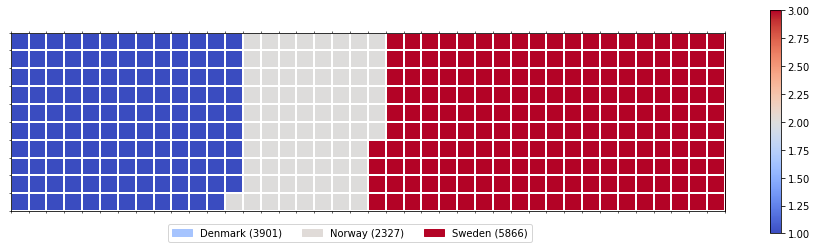

<Figure size 432x288 with 0 Axes>

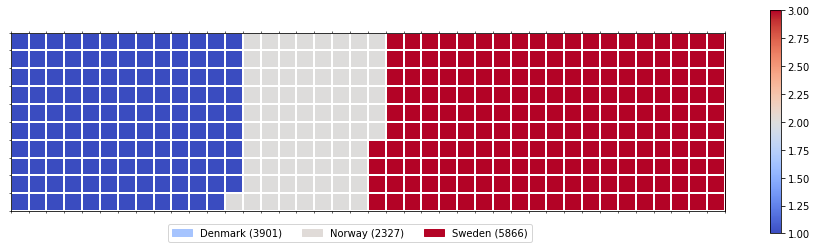

In [43]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

df_can = pd.read_excel('https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skip_footer=2)

print('Data downloaded and read into a dataframe!')

df_can.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace=True)

df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)

df_can.set_index('Country',inplace=True)

df_can['Total']=df_can.sum(axis=1)
df_can.head()
years = list(map(str,range(1980,2014)))

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #needed for waffle chart
#let create a dataframe for three Denmark, Norway and Sweden

df_dsn = df_can.loc[['Denmark','Norway','Sweden'],:]
#print(df_dsn)
total_values = sum(df_dsn['Total'])
#print(total_values)
category_proportions = [(float(value)/total_values) for value in df_dsn['Total'] ]
category_proportions
for i, proportion in enumerate(category_proportions):
    print (df_dsn.index.values[i] + ': ' + str(proportion))

width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print ('Total number of tiles is ', total_num_tiles)
   

    # compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (df_dsn.index.values[i] + ': ' + str(tiles))
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))
print(waffle_chart)
# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print (waffle_chart[row, col])
waffle_chart
# instantiate a new figure object
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])
# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])

total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dsn.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    width = 40 # width of chart
height = 10 # height of chart

categories = df_dsn.index.values # categories
values = df_dsn['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class
create_waffle_chart(categories, values, height, width, colormap)

In [44]:

# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /Users/sumitmaurya/anaconda3

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.5.11               |           py36_0         625 KB  conda-forge
    wordcloud-1.4.1            |           py36_0         156 KB  conda-forge
    certifi-2018.4.16          |           py36_0         142 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         923 KB

The following NEW packages will be INSTALLED:

    wordcloud: 1.4.1-py36_0     conda-forge

The following packages will be UPDATED:

    certifi:   2018.4.16-py36_0             --> 2018.4.16-py36_0 conda-forge
    conda:     4.5.4-py36_0                 --> 4.5.11-py36_0    conda-forge


conda-4.5.11         |  625 KB | #################

File downloaded and saved!


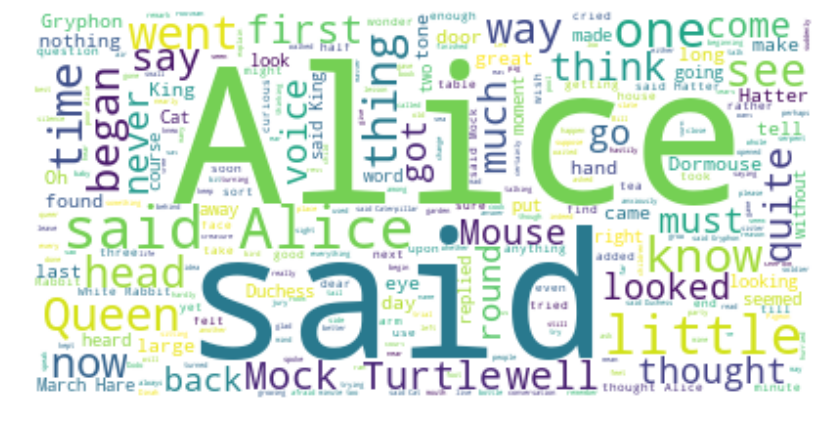

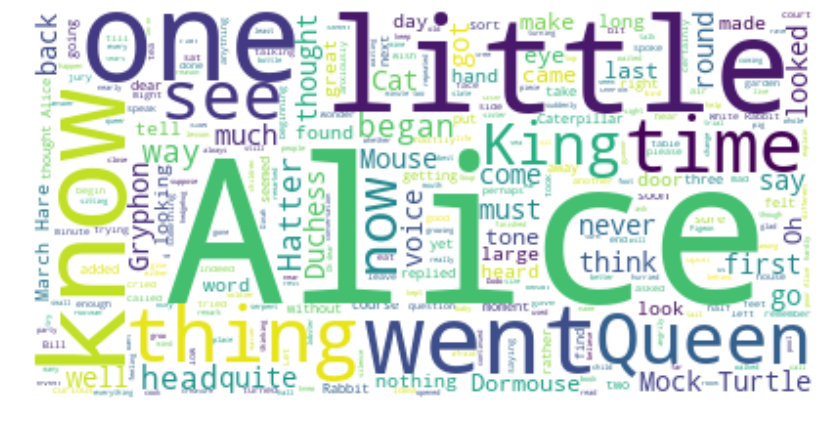

In [54]:

# open the file and read it into a variable alice_novel
alice_novel = open('/Users/sumitmaurya/Downloads/alice.txt', 'r').read()
    
print ('File downloaded and saved!')
stopwords = set(STOPWORDS)
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Image downloaded and saved! [[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


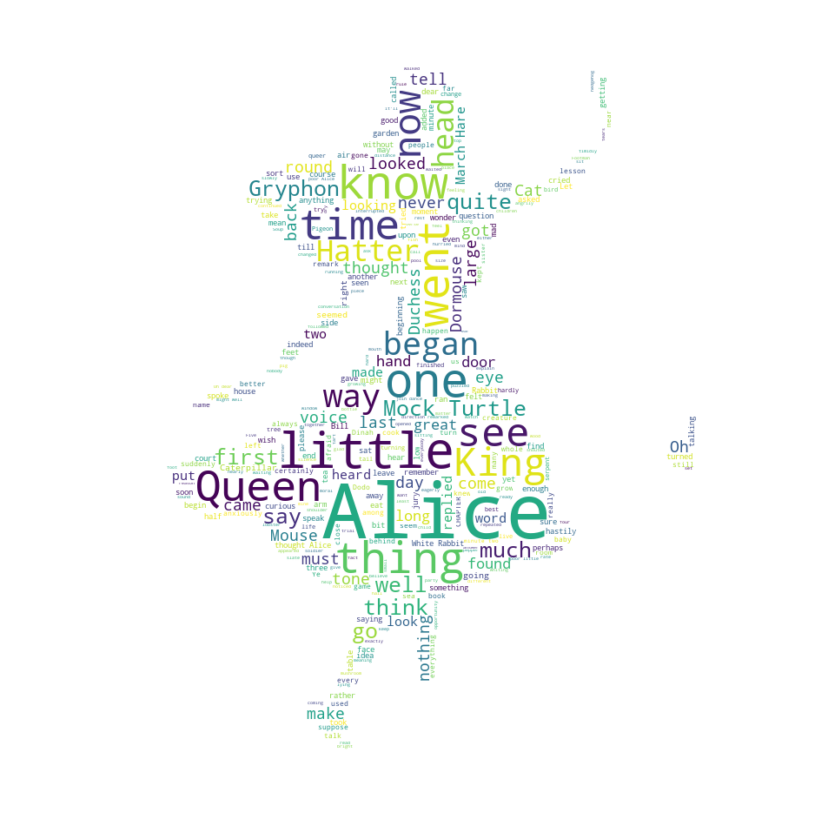

In [60]:
alice_mask = np.array(Image.open('/Users/sumitmaurya/Downloads/alice_mask.png'))
    
print('Image downloaded and saved!',alice_mask)


# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Word cloud created!


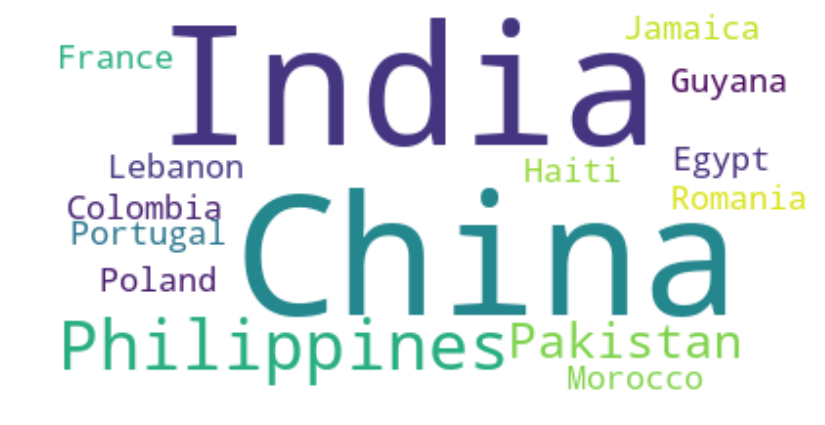

In [64]:
df_can.head()
total_immigration = df_can['Total'].sum()
total_immigration

max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [1]:

!conda install -c conda-forge folium=0.5.0 --yes
import folium

print('Folium installed and imported!')


Solving environment: done

## Package Plan ##

  environment location: /Users/sumitmaurya/anaconda3

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2018.4.16          |           py36_0         142 KB  conda-forge
    branca-0.3.0               |             py_0          24 KB  conda-forge
    conda-4.5.11               |           py36_0         625 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    altair-2.2.2               |           py36_1         460 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.3 MB

The following NEW packages will be INSTALLED:

    altair:  2.2.2-py36_1     conda-forge
    branca:  0.3.0-p

In [28]:
import pandas as pd
# define the world map
world_map = folium.Map()
mexico_latitude = 23.6345;
mexico_longitude = -102.5528;
# define the Mexico map  with a  zoom level =4
world_map = folium.Map(location=[56.130, -106.35], zoom_start=5,tiles='Mapbox Bright')

# display world map
world_map

df_incidents = pd.read_csv('/Users/sumitmaurya/Downloads/Police_Department_Incidents_-_Previous_Year__2016_.csv')

print('Dataset downloaded and read into a pandas dataframe!')
df_incidents.head(5)
df_incidents.shape
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit,:]
df_incidents.shape
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to the map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(sanfran_map)

# show map
sanfran_map

Dataset downloaded and read into a pandas dataframe!


In [29]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

In [13]:
import pandas as pd
import folium
import numpy as np
df_can = pd.read_excel('https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skip_footer=2)

print('Data downloaded and read into a dataframe!')
df_can.head()
# print the dimensions of the dataframe
print(df_can.shape)
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# add total column
df_can['Total'] = df_can.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)
df_can.head()
# download countries geojson file
#!wget --quiet https://ibm.box.com/shared/static/cto2qv7nx6yq19logfcissyy4euo8lho.json -O world_countries.json
    
print('GeoJSON file downloaded!')

world_geo = '/Users/sumitmaurya/Downloads/world-countries.json' # geojson file



# create a numpy array of length 6 and has linear spacing from the minium total immigration to the maximum total immigration
threshold_scale = np.linspace(df_can['Total'].min(),
                              df_can['Total'].max(),
                              6, dtype=int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration

# let Folium determine the scale.
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    threshold_scale=threshold_scale,
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada',
    reset=True
)
world_map

/Users/sumitmaurya/anaconda3/lib/python3.6/site-packages/pandas/util/_decorators.py:177: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


Data downloaded and read into a dataframe!
(195, 43)
data dimensions: (195, 39)
GeoJSON file downloaded!
